# Exercise 10: Convolutional neural network

In this exercise, we will look at an introduction of classifying images using deep convolutional neural networks.

Training convolutional networks on many images can be quite time consuming. We use the same small standard dataset from last weeks exercise. I tgives a good introduction to the topic and is available in Keras. 

The CIFAR-10 data set consists of 50000 training and 10000 test images of size 32x32 labelled into 10 classes. See also https://keras.io/datasets/#cifar10-small-image-classification


In [0]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

Get the datasets if you did not load them last week. Some people experienced problems with loading directly from keras, if that did not work, you can also use the function below which uses http instead of https.

In [2]:
(x_image_train, y_train_label), (x_image_test, y_test_label) = cifar10.load_data()
print(x_image_train.shape)
print(y_train_label.shape)

(50000, 32, 32, 3)
(50000, 1)


Let us look at some of the training images. The images contain 10 different classes.

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def show_images(images, labels):
    fig, axes = plt.subplots(3, 5)
    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        example = np.random.randint(len(images))
        ax.imshow(images[example])
        
        # Name of the true class.
        cls_true_name = label_names[labels[example, 0]]
        xlabel = "{0}".format(cls_true_name)
        
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    return

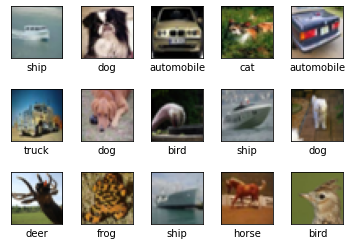

In [4]:
show_images(x_image_train, y_train_label)

In order to compute the loss function (cross entropy) the label data set must be one-hot encoded (also called categorical data)

In [5]:
# hot encoded means generate an array with the length of available classes, and 
# put a 1 where the image belongs to the class
y_train = keras.utils.to_categorical(y_train_label)
y_test = keras.utils.to_categorical(y_test_label)
print(y_train.shape)

(50000, 10)


### Preprocessing

Any input to a neural network should be normalized. For images this could be done per image (which would also normalize contrast) or just adjust the range globally. Normalization should either be so that the data is between 0 and 1 or (even better) between -1 and 1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1.0 1.0


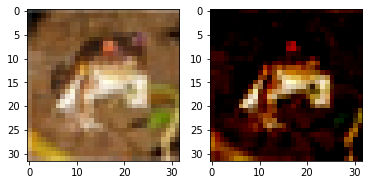

In [6]:
x_train = (2.0 * x_image_train.astype(np.float32) / 255.0) - 1.0
x_test = (2.0 * x_image_test.astype(np.float32) / 255.0) - 1.0
print(np.min(x_train), np.max(x_train))
      
# show image before and after normalization
plt.subplot(1,2,1)
plt.imshow(x_image_train[0])
plt.subplot(1,2,2)
plt.imshow(x_train[0])

The following code calculates a simple convolutional network. 

For image classification, we want to have some convolutional layers, some padding and probably at the end some dense (fully connected) layers.

The last layer needs softmax as activation function for the correct number of classes.

In [0]:
def build_model_1():
    model = keras.Sequential()
    
    # add input shape
    model.add(keras.layers.Layer(input_shape=(32, 32, 3)))
    
    # add convolutional and pooling layers first
    model.add(keras.layers.Conv2D(32,3, padding='valid', activation='relu'))
    # add a pooling layer and another  convolutional layer here
    model.add(keras.layers.Conv2D(32,3, padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(32,3, padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    
    # add dense layers (need to flatten the input first)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
  
    # add the last layer for the number of classes and using softmax
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model
    

In [0]:
model = build_model_1()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer (Layer)                (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data=(x_test, y_test))

Epoch 1/10
50/50 [==============================] - 44s 882ms/step - loss: 1.7398 - accuracy: 0.3866 - val_loss: 1.7189 - val_accuracy: 0.3966
Epoch 2/10
50/50 [==============================] - 45s 903ms/step - loss: 1.7140 - accuracy: 0.3954 - val_loss: 1.6932 - val_accuracy: 0.4040
Epoch 3/10
50/50 [==============================] - 47s 945ms/step - loss: 1.6891 - accuracy: 0.4045 - val_loss: 1.6684 - val_accuracy: 0.4132
Epoch 4/10
50/50 [==============================] - 47s 935ms/step - loss: 1.6646 - accuracy: 0.4120 - val_loss: 1.6460 - val_accuracy: 0.4197
Epoch 5/10
50/50 [==============================] - 47s 940ms/step - loss: 1.6409 - accuracy: 0.4202 - val_loss: 1.6207 - val_accuracy: 0.4305
Epoch 6/10
50/50 [==============================] - 47s 936ms/step - loss: 1.6175 - accuracy: 0.4280 - val_loss: 1.6001 - val_accuracy: 0.4368
Epoch 7/10
50/50 [==============================] - 49s 977ms/step - loss: 1.5971 - accuracy: 0.4356 - val_loss: 1.5826 - val_accuracy: 0.4425

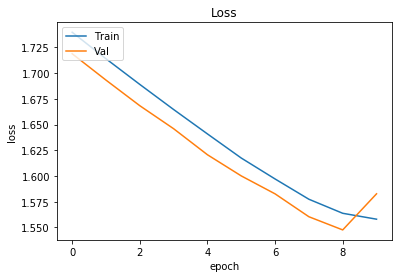

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')


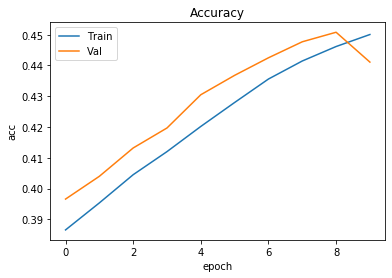

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

### Going further with the model

Even a very simple network gets some decent results. From here we can go further using deeper networks and additional features.

Try the following:
- Train for more episodes
- Make the network deeper by adding more layers
- Increase the capacity by adding more nodes per layer
- add regularization
- add dropout

Convolutional networks benefit from using GPU resources. Google provides a jupyter notebook environment with GPU support: https://colab.research.google.com

This jupyter notebook should run as it is in that environment. To actually get a GPU you have to change the runtime type in the menu 'Runtime'

When building new models, I usually like to keep the old ones for comparison, so I would recommend defining a new function for the new model.

In [0]:
def build_model_2():
    model = keras.Sequential()
    
    # input layer
    model.add(keras.layers.Layer(input_shape=(32, 32, 3)))
    
    # convolutional layers learn features (work like filters), so we start with them
    model.add(keras.layers.Conv2D(32,3, padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(16,3, padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(8,3, padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # flatten for dense layers
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))

    # add the last layer for the number of classes and using softmax
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    return model   

In [52]:
model2 = build_model_2()
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_13 (Layer)             (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 8)           1160      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 2, 2, 8)         

In [53]:
history = model2.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 2.2999 - accuracy: 0.1246 - val_loss: 2.2951 - val_accuracy: 0.1646
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 2.2862 - accuracy: 0.1703 - val_loss: 2.2672 - val_accuracy: 0.1882
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 2.2084 - accuracy: 0.1946 - val_loss: 2.0947 - val_accuracy: 0.2401
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9974 - accuracy: 0.2607 - val_loss: 1.8881 - val_accuracy: 0.2987
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 1.8490 - accuracy: 0.3086 - val_loss: 1.8234 - val_accuracy: 0.3304
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 1.7636 - accuracy: 0.3413 - val_loss: 1.7030 - val_accuracy: 0.3669
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 1.7064 - accuracy: 0.3635 - val_loss: 1.6750 - val_accuracy: 0.3801

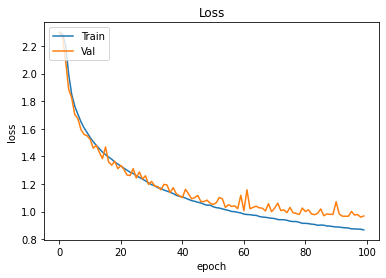

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

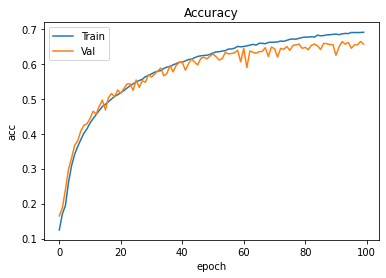

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

### Optimization

Keras supports different optimization models to use in model.compile, see https://keras.io/optimizers/.

- Try different parameters for the SGD like initial learning rate and decay.
- Try some of the oder popular optimization functions, like RMSprop, AdaGrad and Adam



In [0]:
# NOPE xD